<div align="center">

# University of Crete
# Department of Applied Mathematics

## MEM-264: Applied Statistics
### Spring Semester 2022-2023
#### Authors:
#### Theodoros Chalkidis, csd4198@csd.uoc.gr
#### George Manos, csd4333@csd.uoc.gr
#### Christos Zarkos csd4516@csd.uoc.gr

# Imports

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [37]:
full_df = pd.read_csv('../data/movie_revenues.csv')
full_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Part 1
Consider at first only a subset of variables:

In [38]:
full_df['is_english'] = full_df['original_language'] == 'en'

df = full_df[['budget', 'is_english', 'runtime', 'popularity', 'revenue']]

df.head()

,budget,is_english,runtime,popularity,revenue
0,14000000,True,93.0,6.575393,12314651
1,40000000,True,113.0,8.248895,95149435
2,3300000,True,105.0,64.299990,13092000
3,1200000,False,122.0,3.174936,16000000
4,0,False,118.0,1.148070,3923970


## Part 2

For each numerical explanatory variable, compute the correlation coefficient

In [39]:
target = df['revenue']

corrs = {}

for col in df.drop('revenue', axis='columns').columns:
    corrs[col] = df[col].corr(target)

corrs

{'budget': 0.7529645103815288,
 'is_english': 0.1421298728540003,
 'runtime': 0.21638013018147206,
 'popularity': 0.4614602896736129}

Note that budget has the highest correlation coefficient. Therefore, if we were to use only one variable to predict revenue, we should use the movie's budget.

## Part 3

Visualize the relationship of variables with the target variable with a scatter plot

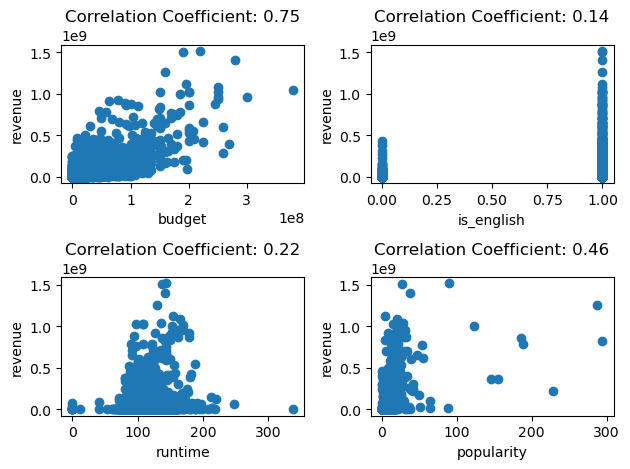

In [40]:
plt.figure()
for i, col in enumerate(df.drop('revenue', axis='columns').columns):
    plt.subplot(2,2,i + 1)
    plt.scatter(df[col], target)
    plt.xlabel(col)
    plt.ylabel('revenue')
    plt.title('Correlation Coefficient: {:.2f}'.format(corrs[col]))
    plt.tight_layout()
plt.show()